# Vector Calculus for AI/ML - Part 1: Fundamentals & Derivatives

Vector Calculus is the mathematical foundation for optimization in machine learning.

**Key Insight:** Most ML reduces to: *Adjust parameters to minimize error*

This notebook covers derivatives, difference quotients, and basic calculus rules.

In [ ]:
"""
Setup: Import Required Libraries (Updated)
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize 
import sympy as sp

# For numerical derivatives, use this instead of deprecated scipy.misc.derivative
from numpy import gradient  # simple 1D/ND numerical derivative
# Or for more precise finite differences:
from scipy.optimize import approx_fprime

# Set display options
np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print(f"NumPy version: {np.__version__}")
print(f"SymPy version: {sp.__version__}")


NumPy version: 2.2.6
SymPy version: 1.13.1


## 1. What is Vector Calculus?

**Core ML Task:** Adjust parameters to minimize error

We always:
1. Define a loss/objective function
2. Measure how wrong the model is
3. Change parameters to reduce error

**Vector calculus gives us the tools to compute HOW to change parameters efficiently.**

In [3]:
"""
Vector Calculus in ML: The Big Picture

ML Problems:
- Parameters → vectors (weights, biases)
- Data → matrices
- Loss → scalar value

Mathematically: f: ℝⁿ → ℝ
Input: vector of parameters
Output: single number (loss)

Vector Calculus Tools:
1. Partial derivatives - change one parameter at a time
2. Gradients - all partial derivatives together
3. Jacobians - for vector-valued outputs
4. Chain rule - for composed functions (neural networks!)
5. Hessian - curvature information
"""

print("="*60)
print("ML Optimization Example")
print("="*60)

# Simple linear regression: y = wx + b
# Goal: find w and b that minimize error

# True relationship (unknown to model)
true_w = 2.5
true_b = 1.0

# Generate synthetic data
np.random.seed(42)
n_samples = 50
X = np.random.randn(n_samples)
y_true = true_w * X + true_b + np.random.randn(n_samples) * 0.3

print(f"\nData:")
print(f"  Samples: {n_samples}")
print(f"  True parameters: w = {true_w}, b = {true_b}")

# Define loss function (Mean Squared Error)
def loss_function(w, b, X, y):
    """
    Compute Mean Squared Error loss
    
    Loss = (1/n) Σ (prediction - actual)²
    
    Args:
        w: weight parameter
        b: bias parameter
        X: input features
        y: true labels
    
    Returns:
        MSE loss (scalar)
    """
    predictions = w * X + b
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

# Try different parameter values
print(f"\nLoss with different parameters:")
test_params = [
    (0, 0),      # Poor guess
    (1, 0),      # Better
    (2.5, 1.0),  # Close to true
    (true_w, true_b)  # Exact (with noise)
]

for w, b in test_params:
    loss = loss_function(w, b, X, y_true)
    print(f"  w={w:4.1f}, b={b:4.1f} → Loss = {loss:.4f}")

print("\n→ Lower loss = better parameters")
print("→ Vector calculus tells us HOW to improve parameters")
print("→ Gradient = direction to move parameters")

ML Optimization Example

Data:
  Samples: 50
  True parameters: w = 2.5, b = 1.0

Loss with different parameters:
  w= 0.0, b= 0.0 → Loss = 5.7340
  w= 1.0, b= 0.0 → Loss = 2.5139
  w= 2.5, b= 1.0 → Loss = 0.0675
  w= 2.5, b= 1.0 → Loss = 0.0675

→ Lower loss = better parameters
→ Vector calculus tells us HOW to improve parameters
→ Gradient = direction to move parameters


## 2. The Goal of Calculus

Calculus is about understanding and controlling **change**.

**Two main operations:**
1. **Derivatives** - Rates of change ("How fast?")
2. **Integrals** - Accumulation ("How much total?")

**In ML:**
- Derivative → tells you which way to adjust weights
- Gradient → multi-dimensional derivative
- Integral → sums effects over dataset

In [5]:
"""
Calculus Concepts in Everyday Life

Derivatives measure RATES OF CHANGE:
- Speed: how fast distance changes over time
- Acceleration: how fast speed changes
- Growth rate: how fast money/population grows

In ML:
- Derivative of loss → how fast loss changes with parameters
- Use this to improve parameters efficiently
"""

print("="*60)
print("Real-World Examples of Derivatives")
print("="*60)

# Example 1: Speed (derivative of distance)
print("\n1. Speed = Derivative of Distance")
print("-"*60)

# Distance function: s(t) = 5t²
def distance(t):
    """Position at time t"""
    return 5 * t**2

def speed(t):
    """Speed = derivative of distance = 10t"""
    return 10 * t

times = [0, 1, 2, 3, 4]
print("\nTime  Distance  Speed (derivative)")
print("-"*40)
for t in times:
    d = distance(t)
    v = speed(t)
    print(f"{t:4.0f}  {d:8.1f}  {v:6.1f}")

print("\n→ Speed tells how fast distance is changing")
print("→ Speed = derivative of distance w.r.t. time")

# Example 2: Marginal Cost (economics)
print("\n2. Marginal Cost = Derivative of Total Cost")
print("-"*60)

def total_cost(units):
    """Total cost to produce 'units' items"""
    # Fixed cost + variable cost
    return 1000 + 50*units + 0.1*units**2

def marginal_cost(units):
    """Cost to produce one more unit (derivative)"""
    # Derivative: 50 + 0.2*units
    return 50 + 0.2*units

production_levels = [0, 100, 200, 300]
print("\nUnits  Total Cost  Marginal Cost")
print("-"*40)
for u in production_levels:
    tc = total_cost(u)
    mc = marginal_cost(u)
    print(f"{u:5.0f}  ${tc:10.2f}  ${mc:6.2f}")

print("\n→ Marginal cost tells if producing more is profitable")
print("→ Derivative helps make business decisions")

# Example 3: ML Training (loss decrease)
print("\n3. ML Training: Loss Decrease Rate")
print("-"*60)

# Simplified loss over training iterations
def training_loss(epoch):
    """Loss at training epoch"""
    return 10 * np.exp(-0.1 * epoch) + 0.5

def loss_decrease_rate(epoch):
    """How fast loss is decreasing (derivative)"""
    return -1.0 * np.exp(-0.1 * epoch)

epochs = [0, 10, 20, 30, 40]
print("\nEpoch  Loss    Decrease Rate")
print("-"*40)
for e in epochs:
    loss = training_loss(e)
    rate = loss_decrease_rate(e)
    print(f"{e:5.0f}  {loss:6.3f}  {rate:8.4f}")

print("\n→ Negative derivative = loss is decreasing (good!)")
print("→ As derivative → 0, learning slows (plateau)")
print("\n" + "="*60)
print("Key Insight: Derivatives measure CHANGE")
print("In ML: We use derivatives to CONTROL change")
print("="*60)

Real-World Examples of Derivatives

1. Speed = Derivative of Distance
------------------------------------------------------------

Time  Distance  Speed (derivative)
----------------------------------------
   0       0.0     0.0
   1       5.0    10.0
   2      20.0    20.0
   3      45.0    30.0
   4      80.0    40.0

→ Speed tells how fast distance is changing
→ Speed = derivative of distance w.r.t. time

2. Marginal Cost = Derivative of Total Cost
------------------------------------------------------------

Units  Total Cost  Marginal Cost
----------------------------------------
    0  $   1000.00  $ 50.00
  100  $   7000.00  $ 70.00
  200  $  15000.00  $ 90.00
  300  $  25000.00  $110.00

→ Marginal cost tells if producing more is profitable
→ Derivative helps make business decisions

3. ML Training: Loss Decrease Rate
------------------------------------------------------------

Epoch  Loss    Decrease Rate
----------------------------------------
    0  10.500   -1.0000
   1

## 3. Difference Quotient

The **difference quotient** measures the *average rate of change* over an interval.

**Formula:**
$$\frac{f(x+h) - f(x)}{h}$$

**Interpretation:** How much does f change per unit change in x?

**As h → 0, this becomes the derivative.**

**ML Application:** Numerical gradient computation when analytical derivatives are hard.

Difference Quotient: Approximating Derivatives

Function: f(x) = x²
Exact derivative at x=3.0: f'(3.0) = 6.0

------------------------------------------------------------
Approximation with different step sizes h
------------------------------------------------------------

   h        Forward   Central   Error(Fwd)  Error(Ctr)
----------------------------------------------------------------------
  1.0000    7.0000    6.0000    1.000000    0.000000
  0.1000    6.1000    6.0000    0.100000    0.000000
  0.0100    6.0100    6.0000    0.010000    0.000000
  0.0010    6.0010    6.0000    0.001000    0.000000
  0.0001    6.0001    6.0000    0.000100    0.000000

→ Smaller h → better approximation
→ Central difference is more accurate
→ But h too small → numerical errors (floating point)

Geometric Interpretation


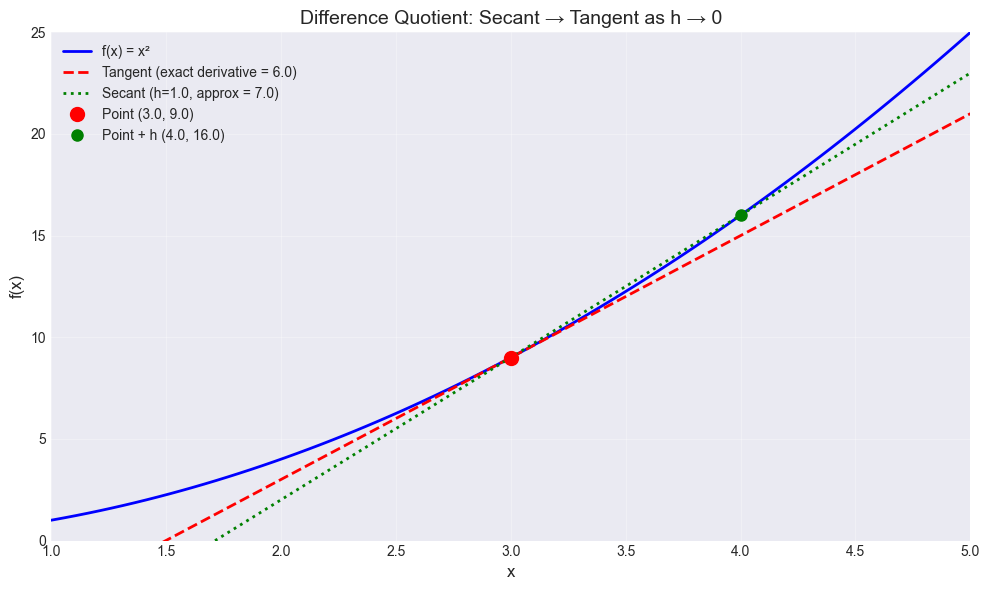


→ Secant line (green) approximates tangent (red)
→ As h → 0, secant becomes tangent
→ Difference quotient → derivative


In [6]:
"""
Difference Quotient - Numerical Derivative

Formula:
    Average rate = [f(x+h) - f(x)] / h

As h gets smaller → better approximation of derivative

Three methods:
1. Forward difference: [f(x+h) - f(x)] / h
2. Backward difference: [f(x) - f(x-h)] / h
3. Central difference: [f(x+h) - f(x-h)] / (2h) ← most accurate
"""

print("="*60)
print("Difference Quotient: Approximating Derivatives")
print("="*60)

# Example function: f(x) = x²
def f(x):
    """Simple quadratic function"""
    return x**2

def f_derivative_exact(x):
    """Exact derivative: f'(x) = 2x"""
    return 2*x

def forward_difference(f, x, h):
    """
    Forward difference quotient
    
    Approximates f'(x) using:
        [f(x+h) - f(x)] / h
    
    Args:
        f: function
        x: point to evaluate derivative
        h: step size (small number)
    
    Returns:
        Approximate derivative
    """
    return (f(x + h) - f(x)) / h

def central_difference(f, x, h):
    """
    Central difference quotient (more accurate)
    
    Approximates f'(x) using:
        [f(x+h) - f(x-h)] / (2h)
    
    Args:
        f: function
        x: point to evaluate derivative
        h: step size
    
    Returns:
        Approximate derivative (better accuracy)
    """
    return (f(x + h) - f(x - h)) / (2*h)

# Test at x = 3
x_test = 3.0
exact_deriv = f_derivative_exact(x_test)

print(f"\nFunction: f(x) = x²")
print(f"Exact derivative at x={x_test}: f'({x_test}) = {exact_deriv}")

print("\n" + "-"*60)
print("Approximation with different step sizes h")
print("-"*60)

step_sizes = [1.0, 0.1, 0.01, 0.001, 0.0001]

print("\n   h        Forward   Central   Error(Fwd)  Error(Ctr)")
print("-"*70)

for h in step_sizes:
    # Compute approximations
    fwd_approx = forward_difference(f, x_test, h)
    ctr_approx = central_difference(f, x_test, h)
    
    # Compute errors
    fwd_error = abs(fwd_approx - exact_deriv)
    ctr_error = abs(ctr_approx - exact_deriv)
    
    print(f"{h:8.4f}  {fwd_approx:8.4f}  {ctr_approx:8.4f}  {fwd_error:10.6f}  {ctr_error:10.6f}")

print("\n→ Smaller h → better approximation")
print("→ Central difference is more accurate")
print("→ But h too small → numerical errors (floating point)")

# Visualize
print("\n" + "="*60)
print("Geometric Interpretation")
print("="*60)

x_plot = np.linspace(0, 5, 100)
y_plot = f(x_plot)

# Point and tangent
x_point = 3.0
y_point = f(x_point)
slope = f_derivative_exact(x_point)

# Tangent line: y - y₀ = m(x - x₀)
tangent_line = y_point + slope * (x_plot - x_point)

# Secant line with h=1
h_visual = 1.0
x_next = x_point + h_visual
y_next = f(x_next)
secant_slope = (y_next - y_point) / h_visual
secant_line = y_point + secant_slope * (x_plot - x_point)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', linewidth=2, label='f(x) = x²')
plt.plot(x_plot, tangent_line, 'r--', linewidth=2, label=f'Tangent (exact derivative = {slope})')
plt.plot(x_plot, secant_line, 'g:', linewidth=2, label=f'Secant (h={h_visual}, approx = {secant_slope})')

# Mark points
plt.plot(x_point, y_point, 'ro', markersize=10, label=f'Point ({x_point}, {y_point})')
plt.plot(x_next, y_next, 'go', markersize=8, label=f'Point + h ({x_next}, {y_next})')

plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Difference Quotient: Secant → Tangent as h → 0', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(1, 5)
plt.ylim(0, 25)
plt.tight_layout()
plt.show()

print("\n→ Secant line (green) approximates tangent (red)")
print("→ As h → 0, secant becomes tangent")
print("→ Difference quotient → derivative")

## 4. Derivative

**Derivative = instantaneous rate of change = slope of tangent line**

**Definition:**
$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

**Interpretation:** How fast the output changes when input changes slightly.

**ML Significance:**
- Derivative = sensitivity signal
- Large derivative → change parameter aggressively
- Small derivative → barely change
- Zero derivative → stop (local optimum)

In [ ]:
"""
Derivative: Exact vs Numerical

Two ways to find derivatives:
1. Analytical (symbolic) - using calculus rules
2. Numerical - using difference quotient

In ML:
- Automatic differentiation combines both
- Backpropagation uses chain rule (analytical)
- Sometimes use numerical for verification
"""

print("="*60)
print("Computing Derivatives: Analytical vs Numerical")
print("="*60)

# Example 1: Polynomial
print("\nExample 1: f(x) = 3x² + 2x + 1")
print("-"*60)

def f1(x):
    """Polynomial function"""
    return 3*x**2 + 2*x + 1

def f1_prime(x):
    """Analytical derivative: f'(x) = 6x + 2"""
    return 6*x + 2

# Using SymPy for symbolic differentiation
x = sp.Symbol('x')
f_sympy = 3*x**2 + 2*x + 1 # type: ignore
f_prime_sympy = sp.diff(f_sympy, x)

print(f"Function: {f_sympy}")
print(f"Derivative (symbolic): {f_prime_sympy}")

# Test at x = 2
x_val = 2.0
analytical = f1_prime(x_val)
numerical = central_difference(f1, x_val, 0.0001)

print(f"\nAt x = {x_val}:")
print(f"  Analytical: f'({x_val}) = {analytical}")
print(f"  Numerical:  f'({x_val}) = {numerical:.6f}")
print(f"  Match: {np.isclose(analytical, numerical)} ✓")

# Example 2: Exponential
print("\nExample 2: f(x) = e^x")
print("-"*60)

def f2(x):
    """Exponential function"""
    return np.exp(x)

def f2_prime(x):
    """Derivative of e^x is e^x"""
    return np.exp(x)

x_val = 1.0
analytical = f2_prime(x_val)
numerical = central_difference(f2, x_val, 0.0001)

print(f"\nAt x = {x_val}:")
print(f"  Analytical: f'({x_val}) = {analytical:.6f}")
print(f"  Numerical:  f'({x_val}) = {numerical:.6f}")
print(f"  Match: {np.isclose(analytical, numerical)} ✓")

# Example 3: Trigonometric
print("\nExample 3: f(x) = sin(x)")
print("-"*60)

def f3(x):
    """Sine function"""
    return np.sin(x)

def f3_prime(x):
    """Derivative of sin(x) is cos(x)"""
    return np.cos(x)

x_val = np.pi / 4  # 45 degrees
analytical = f3_prime(x_val)
numerical = central_difference(f3, x_val, 0.0001)

print(f"\nAt x = π/4:")
print(f"  Analytical: f'(π/4) = {analytical:.6f}")
print(f"  Numerical:  f'(π/4) = {numerical:.6f}")
print(f"  Match: {np.isclose(analytical, numerical)} ✓")

# Common Derivatives Table
print("\n" + "="*60)
print("Common Derivative Rules")
print("="*60)

derivatives_table = [
    ("Constant", "c", "0"),
    ("Linear", "x", "1"),
    ("Power", "x^n", "n·x^(n-1)"),
    ("Exponential", "e^x", "e^x"),
    ("Natural log", "ln(x)", "1/x"),
    ("Sine", "sin(x)", "cos(x)"),
    ("Cosine", "cos(x)", "-sin(x)"),
]

print("\nFunction          f(x)        f'(x)")
print("-"*60)
for name, func, deriv in derivatives_table:
    print(f"{name:17s} {func:11s} {deriv}")

print("\n→ Memorize these basic rules")
print("→ Build complex derivatives using sum/product/chain rules")

Computing Derivatives: Analytical vs Numerical

Example 1: f(x) = 3x² + 2x + 1
------------------------------------------------------------
Function: 3*x**2 + 2*x + 1
Derivative (symbolic): 6*x + 2

At x = 2.0:
  Analytical: f'(2.0) = 14.0
  Numerical:  f'(2.0) = 14.000000
  Match: True ✓

Example 2: f(x) = e^x
------------------------------------------------------------

At x = 1.0:
  Analytical: f'(1.0) = 2.718282
  Numerical:  f'(1.0) = 2.718282
  Match: True ✓

Example 3: f(x) = sin(x)
------------------------------------------------------------

At x = π/4:
  Analytical: f'(π/4) = 0.707107
  Numerical:  f'(π/4) = 0.707107
  Match: True ✓

Common Derivative Rules

Function          f(x)        f'(x)
------------------------------------------------------------
Constant          c           0
Linear            x           1
Power             x^n         n·x^(n-1)
Exponential       e^x         e^x
Natural log       ln(x)       1/x
Sine              sin(x)      cos(x)
Cosine           

## Part 1 Summary

**Completed:**
- What is Vector Calculus (1)
- Goal of Calculus (2)
- Difference Quotient (3)
- Derivative (4)

**Next in Part 2:**
- Differentiation Rules (Sum, Product, Chain)
- Taylor Series

and more ...!